# Climatological product

> Setelah membaca chapter ini, pembaca diharapkan dapat membuat produk klimatologis (peta spasial dan diagram windrose) berdasarkan wilayah pelayanan provinsi.

## Intro

Pada chapter sebelumnya, kita telah mencoba mengolah data multi dimensi menggunakan data sampel, mulai dari operasi dasar hingga visualisasi data pada peta spasial. Chapter ini akan menggabungkan beberapa chapter sebelumnya untuk membuat produk klimatologi spasial, area, dan titik. Terdapat tiga proses:
- load data: inacawo, inawaves, dan inaflows. Khusus untuk pelatihan ini, data sample tersedia selama tahun 2020-2025 untuk inawaves dan inaflows, serta 2025-sekarang untuk inacawo.
- preprocess data: agregrasi (perhitungan klimatologi).
- plot data: peta spasial, wind & wave rose.

Dalam hal ini, kita akan menggunakan template script yang telah disimpan dalam bentuk modul (`klimtool.py`) untuk mempermudah pemrosesan. 

Script `klimtool.py` berisi beberapa `class`, namun hanya `class` `klimtool` yang akan dipanggil di notebook ini. `class` `klimtool` memiliki method yang ditujukan sebagai data loader, preprocessor, hingga plotter. Untuk setiap langkah yang diselesaikan dengan memanggil modul tersebut, terdapat penjelasan singkat agar pembaca dapat memahami alur dari pemrosesan data.

## Load module & dataset

| Method | Deskripsi | Argumen mandatory |
| :- | :- | :- |
| `klimtool.open_inawaves` | Membuka dataset inawaves | - `tstart: datetime` \|<br> - `tend: datetime` \|<br> - `latlon: list[float]` | 
| `klimtool.open_inaflows` | Membuka dataset inaflows | - `tstart: datetime` \|<br> - `tend: datetime` \|<br> - `latlon: list[float]` | 
| `klimtool.open_inacawo` | Membuka dataset inacawo | - `tstart: datetime` \|<br> - `tend: datetime` \|<br> - `latlon: list[float]` | 

dimana
- `tstart` | `tend` -> masing-masing merupakan batas waktu awal dan akhir.
- `latlon` -> list berisi batas kiri dan kanan (longitude) serta bawah dan atas (latitude).

### Load module

In [1]:
from klimtool import klimtool # main module

import datetime
import geopandas as gpd
import rioxarray
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from windrose import WindroseAxes

klimtool = klimtool()

### Definisikan batas waktu dan area

In [2]:
timestart = datetime.datetime(2020,1,1)
timeend   = datetime.datetime(2025,5,1)
lonw = 90
lone = 145
latb = -15
latt = 15
latlon = [lonw, lone, latb, latt]

### Load Inawaves

In [3]:
%%time
dsinawaves = klimtool.open_inawaves(tstart=timestart, tend=timeend, latlon=latlon)
dsinawaves

/home/tyo/marinemet-training/2_/klimtool.py:505: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dset = xr.open_zarr(self.__INAWAVE_PATH__)


CPU times: user 385 ms, sys: 172 ms, total: 556 ms
Wall time: 4.07 s


<xarray.Dataset> Size: 396GB
Dimensions:  (time: 14616, lat: 481, lon: 881)
Coordinates:
  * lat      (lat) float64 4kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float64 7kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
  * time     (time) datetime64[ns] 117kB 2020-01-01 ... 2024-12-31T21:00:00
Data variables: (12/16)
    dir      (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    hmax     (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    hs       (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    lm       (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    pdi00    (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    pdi01    (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    ...       ...
    ptp00    (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    ptp01    (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    ptp02    (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    t01      (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    uwnd     (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
    vwnd     (time, lat, lon) float32 25GB dask.array<chunksize=(8, 481, 881), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    description:  InaWaves Model - Merge Hindcast, Reanalysis, and Forecast
    email:        produksi.maritim@bmkg.go.id
    institution:  BMKG - Center For Marine Meteorology
    source:       WaveWatch3 forced by GFS Model

### Load Inaflows

In [4]:
%%time
dsinaflows = klimtool.open_inaflows(tstart=timestart, tend=timeend, latlon=latlon)
dsinaflows

CPU times: user 169 ms, sys: 209 ms, total: 379 ms
Wall time: 3.47 s


<xarray.Dataset> Size: 140GB
Dimensions:  (time: 14616, lat: 751, lon: 638)
Coordinates:
  * lat      (lat) float64 6kB -15.0 -14.96 -14.92 -14.88 ... 14.92 14.96 15.0
  * lon      (lon) float64 5kB 94.0 94.08 94.16 94.24 ... 144.8 144.9 145.0
  * time     (time) datetime64[ns] 117kB 2020-01-01 ... 2024-12-31T21:00:00
Data variables:
    S        (time, lat, lon) float32 28GB dask.array<chunksize=(8, 751, 638), meta=np.ndarray>
    T        (time, lat, lon) float32 28GB dask.array<chunksize=(8, 751, 638), meta=np.ndarray>
    u        (time, lat, lon) float32 28GB dask.array<chunksize=(8, 751, 638), meta=np.ndarray>
    v        (time, lat, lon) float32 28GB dask.array<chunksize=(8, 751, 638), meta=np.ndarray>
    zeta     (time, lat, lon) float32 28GB dask.array<chunksize=(8, 751, 638), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [5]:
%%time
dsinacawo = klimtool.open_inacawo(tstart=timestart, tend=timeend, latlon=latlon)
dsinacawo

CPU times: user 3.93 s, sys: 152 ms, total: 4.08 s
Wall time: 4.21 s


<xarray.Dataset> Size: 185GB
Dimensions:  (time: 673, lat: 1200, lon: 2201)
Coordinates:
  * lat      (lat) float64 10kB -15.0 -14.97 -14.95 -14.92 ... 14.93 14.95 14.98
  * lon      (lon) float64 18kB 90.0 90.02 90.05 90.08 ... 144.9 145.0 145.0
  * time     (time) datetime64[ns] 5kB 2025-04-01 ... 2025-05-01
Data variables: (12/27)
    S        (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    T        (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    ch       (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    cycle    (time) datetime64[ns] 5kB dask.array<chunksize=(2,), meta=np.ndarray>
    dir      (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    gust     (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    ...       ...
    uw       (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    uwnd     (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    v        (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    vw       (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    vwnd     (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
    zeta     (time, lat, lon) float32 7GB dask.array<chunksize=(2, 1200, 2201), meta=np.ndarray>
Attributes:
    contact:      produksi.maritim@bmkg.go.id
    conventions:  CF-1.8
    description:  Indonesia Coupled Atmosphere Wave Ocean (InaCAWO)
    institution:  BMKG - Center For Marine Meteorology
    source:       InaCAWO - 3km High Resolution

### Load Inacawo

## Processing - Agregrasi data

Tahap processing pada pembuatan produk klimatologi dilakukan dengan tujuan untuk melakukan agregrasi statistik sesuai dengan kebutuhan analisis klimatologi. Setidaknya terdapat tiga hal yang mesti diperhatikan, yaitu waktu, lokasi, dan parameter statistik.

| No | Parameter | Deskripsi | Method `xarray` yang digunakan |
| :- | :- | :- | :- |
| 1. | Waktu | Merujuk pada batas dan frekuensi waktu yang akan diproses. Frekuensi waktu<br>- `1H`: per1jam (hanya untuk dataset inacawo)<br>- `3H`: per3jam<br>- `1D`: harian<br>- `MS`: bulanan<br>- `YS`: Tahunan<br> | - `.sel` & `.isel`: seleksi batas dimensi waktu<br>- `.groupby`: grouping dimensi waktu berdasarkan frekuensi tertentu<br> - `resample`: resampling dimensi waktu | 
| 2. | Lokasi | Merujuk pada batas spasial \| area wilayah provinsi \| atau lokasi titik | - `.sel` & `.isel`: seleksi batas dimensi waktu<br> - `clipping` kombinasi dengan `geopandas` & `rioxarray` untuk memotong area wilayah provinsi |
| 3. | Statistik | Merujuk pada parameter statistik untuk proses agregrasi data. Parameter yang umum digunakan: <br> - rata-rata<br> - maximum<br> - minimum<br> - standar deviasi<br> - percentile | - `.mean` \| `.max` \| `.min` \| `.std` \| `.sum` \| `.median` \| `.quantile`  |

## Klimatologi Spasial

| Method | Deskripsi | Argument mandatory | Opsi |
| :- | :- | :- | :- |
| `klimtool.plot_map` | Plotting untuk peta spasial | 1. `model:str`<br>2. `ds:Dataset`<br>3. `timefreq:str`<br>4. `var:str`<br>5. `area_type:str`<br>6. `area_name:str`<br>7. `map_title: str`<br>8. `out_dir:str` | 1. `inawave` \| `inaflow` \| `inacawo`<br>2. `xarray.Dataset`<br>3. `1H` \| `MS`<br>4. `swh` \| `ws` \| `psh` \| `wsh` \| `csd` \| `s` \| `st` \| `sl`<br>5. `wilpro` \| `False`<br>6. `indonesia`  \|  `aceh` \| `babel` \| `bali` \| `banten` \| `bengkulu` \| `diy` \| `dki_jabar` \| `gorontalo` \| `jambi` \| `jateng` \| `jatim` \| `kalbar` \| `kalsel` \| `kaltara` \| `kalteng` \| `kaltim` \| `kep_riau` \| `lampung` \| `maluku` \| `maluku_utara` \| `ntb` \| `ntt` \| `papua_barat` \| `papua_barat_daya` \| `papua_selatan` \| `papua_tengah` \| `riau` \| `sulbar` \| `sulsel` \| `sulteng` \| `sultra` \| `sulut` \| `sumbar` \| `sumut` \| `sumsel`<br>7. `False` \| Custom<br>8. Custom |

### Processing

Batas lokasi sudah didefine waktu proses load dataset, sehingga di tahap ini tidak perlu diulang. Kecuali jika pembaca menghendaki untuk area yang lebih spesifik, maka dataset bisa diseleksi untuk area yang diinterest. 

Oleh karena itu, pada tahap ini, kita bisa melakukan proses agregasi sesuai dengan parameter statistik yang dibutuhkan.

Pada case ini, kita akan mencoba melakukan agregasi dataset inawaves untuk menghitung nilai rata-rata bulanan.

#### inawaves

In [6]:
dsinawavesagregated = dsinawaves.groupby('time.month')
dsinawavesmean = dsinawavesagregated.mean()
dsinawavesmean

<xarray.Dataset> Size: 325MB
Dimensions:  (month: 12, lat: 481, lon: 881)
Coordinates:
  * lat      (lat) float64 4kB -15.0 -14.94 -14.88 -14.81 ... 14.88 14.94 15.0
  * lon      (lon) float64 7kB 90.0 90.06 90.12 90.19 ... 144.9 144.9 145.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/16)
    dir      (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    hmax     (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    hs       (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    lm       (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    pdi00    (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    pdi01    (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    ...       ...
    ptp00    (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    ptp01    (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    ptp02    (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    t01      (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    uwnd     (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
    vwnd     (month, lat, lon) float32 20MB dask.array<chunksize=(1, 481, 881), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    description:  InaWaves Model - Merge Hindcast, Reanalysis, and Forecast
    email:        produksi.maritim@bmkg.go.id
    institution:  BMKG - Center For Marine Meteorology
    source:       WaveWatch3 forced by GFS Model

Proses diatas menghasilkan grouped dataset berdasarkan bulanan. Tiap-tiap grup berisi dataset untuk bulan tersebut selama periode waktu tersimpan dalam dataset.

Selain `.groupby`, kita juga bisa menggunakan `.resample` dengan sedikit perubahan syntax.
```python
dsinawaves.resample(time='MS')
```

Untuk mendapatkan nilai rata-rata, method `.mean` bisa dijalankan, kita simpan dalam variabel `dsinawavesmean`.

Proses diatas menghasilkan dataset berisi rata-rata bulanan selama periode waktu tersimpan di dataset (3 tahun, 2022-2024). Selanjutnya, kita dapat melakukan plotting.

In [7]:
dsinaflowsmean = dsinaflows.groupby('time.month').mean()
dsinaflowsmean

<xarray.Dataset> Size: 115MB
Dimensions:  (month: 12, lat: 751, lon: 638)
Coordinates:
  * lat      (lat) float64 6kB -15.0 -14.96 -14.92 -14.88 ... 14.92 14.96 15.0
  * lon      (lon) float64 5kB 94.0 94.08 94.16 94.24 ... 144.8 144.9 145.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    S        (month, lat, lon) float32 23MB dask.array<chunksize=(1, 751, 638), meta=np.ndarray>
    T        (month, lat, lon) float32 23MB dask.array<chunksize=(1, 751, 638), meta=np.ndarray>
    u        (month, lat, lon) float32 23MB dask.array<chunksize=(1, 751, 638), meta=np.ndarray>
    v        (month, lat, lon) float32 23MB dask.array<chunksize=(1, 751, 638), meta=np.ndarray>
    zeta     (month, lat, lon) float32 23MB dask.array<chunksize=(1, 751, 638), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

### Plotting

24
17.725174701023914


File tersimpan di out/spasial/klimatologi_swh_january.png


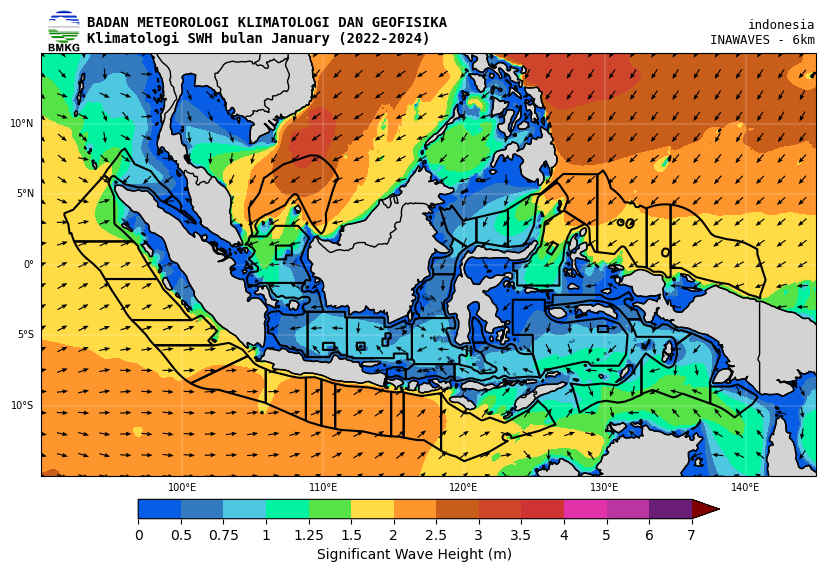

In [8]:
model     = 'inawave'
ds        = dsinawavesmean.isel(month=0)
timefreq  = 'MS'
var       = 'swh'
area_type = 'wilpro'
area_name = 'indonesia' # ganti sesuai wilayah provinsi untuk menampilkan shp
map_title = 'Klimatologi SWH bulan January (2022-2024)'
file_out   = 'out/spasial/klimatologi_swh_january.png'

if not os.path.exists(os.path.dirname(file_out)):
    os.makedirs(os.path.dirname(file_out))

klimtool.plot_map(
    model=model,
    ds=ds,
    timefreq=timefreq,
    var=var,
    area_type=area_type,
    area_name=area_name,
    map_title=map_title,
    file_name=file_out
)

In [9]:
model     = 'inaflow'
ds        = dsinaflowsmean.isel(month=0)
timefreq  = 'MS'
var       = 'csd'
area_type = 'wilpro' # ganti sesuai wilayah pelayanan, atau biarkan kosong
area_name = 'indonesia' # ganti sesuai wilayah pelayanan, atau biarkan kosong
map_title = 'Klimatologi SWH bulan January (2022-2024)'
file_out   = 'out/spasial/klimatologi_swh_january.png'

if not os.path.exists(os.path.dirname(file_out)):
    os.makedirs(os.path.dirname(file_out))

klimtool.plot_map(
    model=model,
    ds=ds,
    timefreq=timefreq,
    var=var,
    area_type=area_type,
    area_name=area_name,
    map_title=map_title,
    file_name=file_out
)

18
13.810792149686822


#### 💡 Worth to try: Batch plotting

Batch plotting menggunakan loop untuk memplot banyak waktu. Bagaimana skenarionya?
- Looping berdasarkan dimensi waktu, tentunya setelah dataset dilakukan proses agregasi.
- Perlu menyiapkan argumen dinamis (dalam hal ini `map_title` dan `file_name`) yang disimpan dalam bentuk `collection` (prefer menggunakan `list`) sebagai inputan fungsi `klimtool.plot_map` untuk menghindari duplikasi file. Sisa argumen bisa dibiarkan statis (tanpa diubah sepanjang proses loop).

Example ⚠️(Error excpected)⚠️, adjust to your data:
```python
model     = 'inawave'
timefreq  = 'MS'
var       = 'sw'
area_type = 'wilpro'
area_name = 'indonesia'

timelist       = yourdataset.timedimension.data
# Generate title bisa menggunakan method `.strftime` dari built in method dari `datetime.datetime`
list_map_title = ['your', 'map_title', 'list']
list_file_out  = ['your', 'file_name', 'list']

for t, time in enumerate(yourdataset.timedimension.data):
    dset2plot = yourdataset.sel(timedimension=time)
    map_title = list_map_title[t]
    file_name = list_file_out[t]
    klimtool.plot_map(
        model=model,
        ds=dset2plot,
        timefreq=timefreq,
        var=var,
        area_type=area_type,
        area_name=area_name,
        map_title=map_title,
        file_name=file_out
    )
```

In [9]:
# Your expected script here






## Klimatologi Area dan titik

| Method | Deskripsi | Argument mandatory |
| :- | :- | :- |
| `klimtool.plot_rose` | Memulai plotting untuk wind atau wave rose | `model:str` | `ds:xarray.Dataset` | `timefreq:str` | `var:str` | `area_type:str` | `area_name:str` |  `map_title: str` | `out_dir:str` |

### Processing - Titik dan Area

Output akhir pada proses ini adalah dalam bentuk titik dan time series.

| Lokasi | Deskripsi | Method |
| :- | :- | :- |
| Area | Area spasial yang ditentukan melalui batas latitude dan longitude atau mengikuti Wilayah Provinsi| - `.sel` dan `.isel`<br>- `rioxarray.clip`|
| Titik | Lokasi di satu titik | - `sel` dan `.isel`<br>- `interpolate` |

Dataset yang telah diseleksi untuk area tertentu dilakukan pemrosesan agregasi spasial untuk mendapatkan data time series. Pada kesempatan ini, kita hanya akan membahas agregasi rata-rata spasial `.mean`.

Dalam hal ini, kita akan memproses dataset menggunakan method `.resample` untuk mendapatkan rata-rata bulanan selama lima tahun terakhir.

### Titik

Pada case ini, kita akan mencoba untuk memproses lokasi lat lon berikut: -5.78 & 106.84.

#### Processing

Nilai ditarik menggunakan metode nearest untuk mendapatkan grid terdekat dengan titik tersebut.

In [4]:
dsrose = dsinawaves.resample(time='MS').mean()
dset_loc_sel = dsrose.sel(lat=-10, lon=106.84, method='nearest')
dsrosegrouped = dset_loc_sel.groupby('time.month')
dsrosegrouped

<DatasetGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

#### Plotting

File saved at wave_rose.png


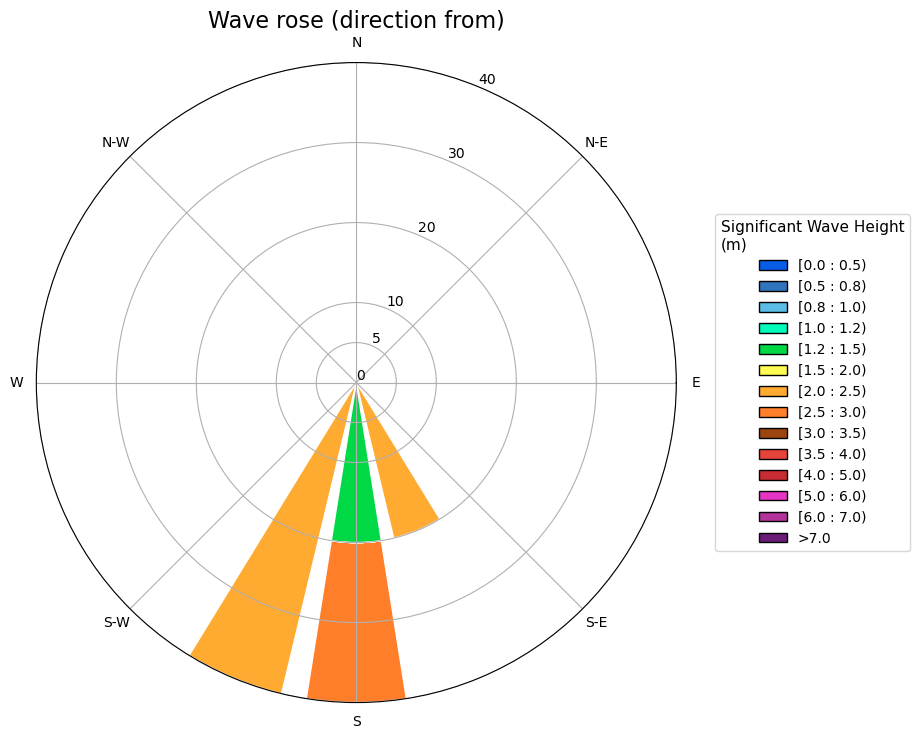

In [5]:
dsroseplot = dsrosegrouped[1]

model     = 'inawave'
var       = 'swh'
ds        = dsroseplot
map_title = 'Wave rose (direction from)'
file_name = 'wave_rose.png'
bins      = sorted([5] + [int(num) for num in np.arange(0, 41, 10)])

klimtool.plot_rose(model, 'swh', dsroseplot, bins, map_title, file_name)

#### Multi panel plot

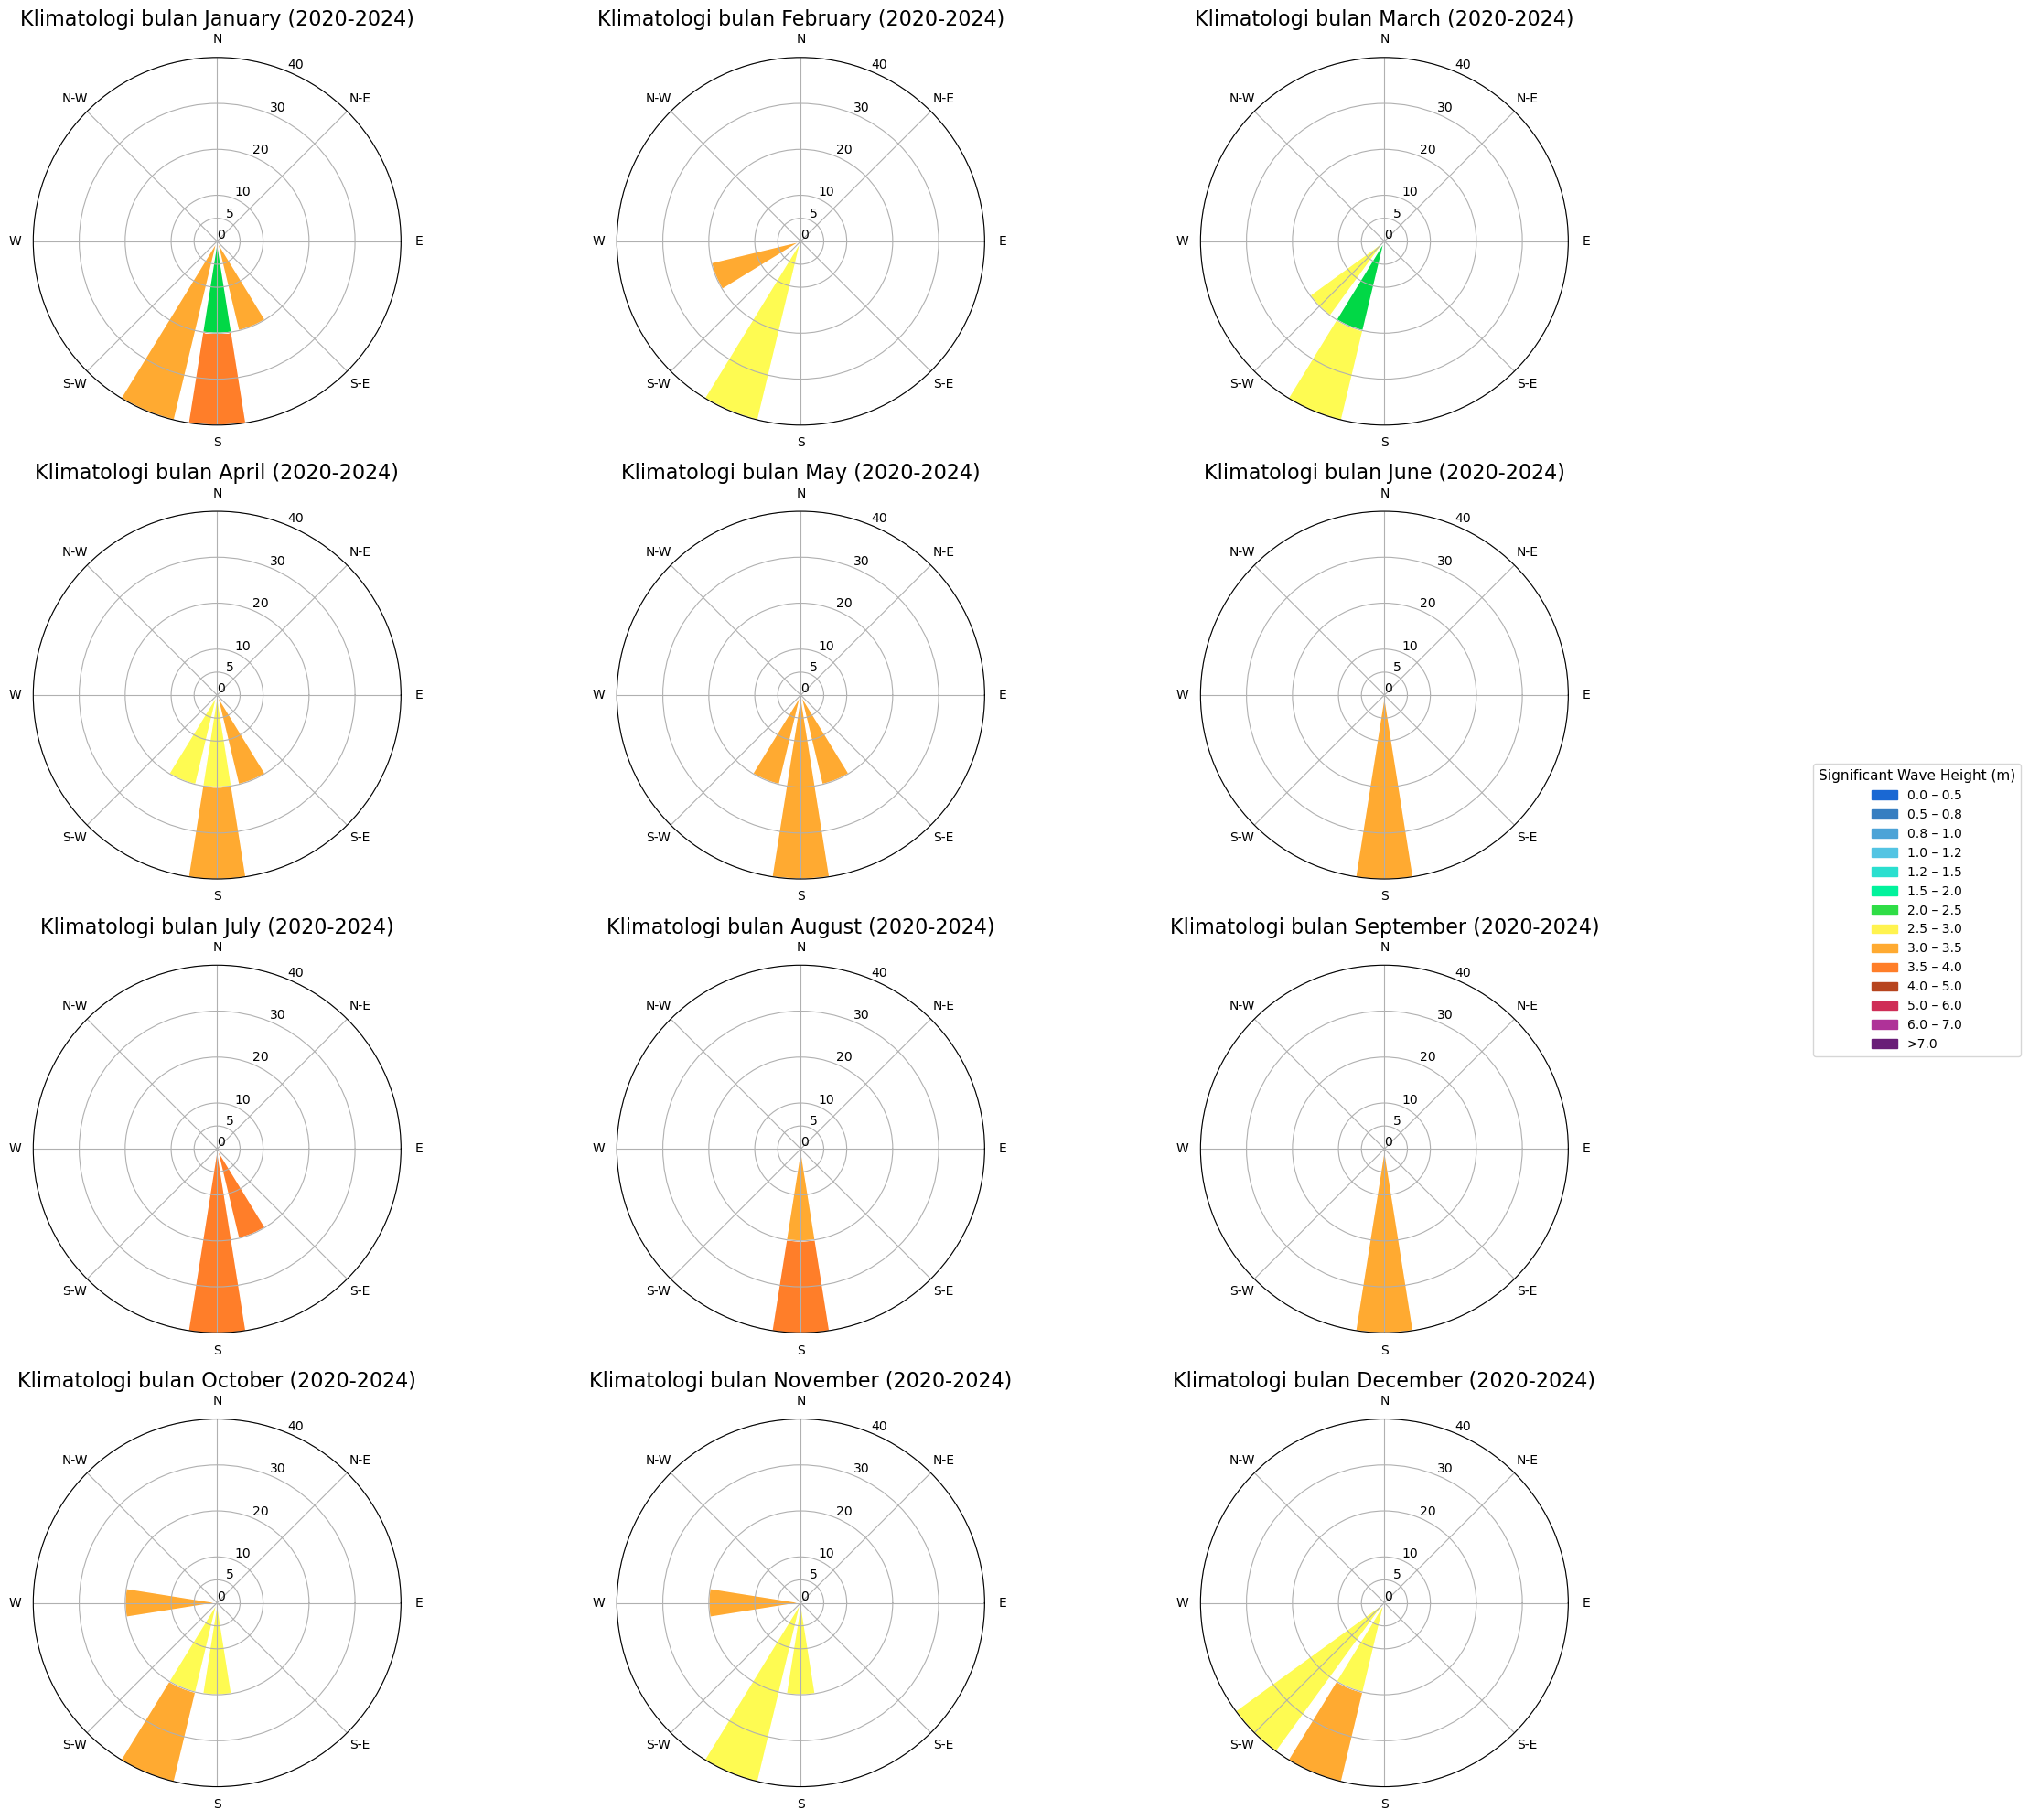

In [6]:
numcols = 3
numrows = 4
list_title = [month.strftime("Klimatologi bulan %B (2020-2024)") for month in pd.date_range('2020-01-01', '2020-12-01', freq='MS')]

fig  = plt.figure(figsize=(20, 20))
gs   = gridspec.GridSpec(4, 3)  # 4 rows, 3 columns
bins = sorted([5] + [int(num) for num in np.arange(0, 41, 10)])

for i in range(len(list_title)):
    row = i // 3
    col = i % 3
    ax = WindroseAxes(fig, gs[row, col])
    fig.add_axes(ax)
    
    month = i+1
    dsroseplot = dsrosegrouped[month]
    map_title = list_title[i]
    file_name = f"roseplot_{month:02d}.png"  # e.g., roseplot_01.png, roseplot_12.png
    
    klimtool.plot_rose(
        model=model,
        var='swh',
        ds=dsroseplot,
        bins=bins,
        map_title=map_title,
        file_name=file_name,
        ax=ax
    )
    if i == 11:
        legend_ax = ax

handles, labels, title = klimtool.get_color_legend_patches('swh')
fig.legend(
    handles=handles,
    labels=labels,
    title="Significant Wave Height (m)",
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    fontsize=10,
    title_fontsize=11,
    ncol=1
)
legend = legend_ax.get_legend()
if legend is not None:
    legend.remove()

# plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.tight_layout()
plt.show()

### Area

Pada case ini, kita akan mencoba untuk memproses salah satu wilayah Provinsi (Selat Sunda Selatan Lampung).

#### Processing

In [7]:
shp = gpd.read_file("/data/local/shpmetoswilpro/METOS_WILPRO_20231018.shp")
shp.columns

Index(['FID_METOS_', 'OBJECTID', 'DIS', 'Perairan', 'Met_Area', 'Label', 'ID',
       'sub_ID', 'ID_MAR', 'ID_Stat', 'wilpro', 'geometry'],
      dtype='object')

##### Check wilayah masing-masing UPT

In [8]:
shp.Perairan.unique()

array([None, 'Aceh', 'Sumatra Utara', 'Riau', 'Sumatra Barat', 'Bengkulu',
       'Jambi', 'Sumatra Selatan', 'Jawa Barat', 'Jawa Tengah',
       'Kep. Riau', 'Kalimantan Barat', 'Kep. Bangka Belitung',
       'DKI Jakarta', 'Kalimantan Selatan', 'Kalimantan Utara',
       'Kalimantan Timur', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Maluku Utara',
       'Sulawesi Utara', 'Papua', 'Papua Tengah', 'Papua Selatan',
       'DI Yogyakarta', 'Maluku', 'Sulawesi Barat', 'Kalimantan Tengah',
       'Jawa Timur', 'Banten', 'Lampung', 'Papua Barat Daya',
       'Papua Barat', 'Sulawesi Tenggara', 'Bali'], dtype=object)

In [9]:
# Check Wilayah Provinsi masing-masing
shp[shp['Perairan'] == 'Lampung'] # <= ganti DKI Jakarta sesuai UPT masing-masing

,FID_METOS_,OBJECTID,DIS,Perairan,Met_Area,Label,ID,sub_ID,ID_MAR,ID_Stat,wilpro,geometry
82,2,2,1.0,Lampung,None,P,1,None,P.H.1,H,Perairan Barat Lampung,"POLYGON Z ((103.59724 -4.92487 0, 103.59766 -4..."
241,2,2,1.0,Lampung,None,P,6,None,P.H.6,H,Perairan Timur Lampung Bagian Utara,"POLYGON Z ((106.04205 -4.18244 0, 106.01839 -4..."
318,2,2,1.0,Lampung,None,P,3,None,P.H.3,H,Perairan Teluk Lampung Bagian Utara,"POLYGON Z ((105.29076 -5.44539 0, 105.29065 -5..."
319,2,2,1.0,Lampung,None,P,4,None,P.H.4,H,Perairan Teluk Lampung Bagian Selatan,"POLYGON Z ((105.31247 -5.82966 0, 105.31266 -5..."
353,2,2,1.0,Lampung,None,P,5,None,P.H.5,H,Perairan Timur Lampung Bagian Selatan,"POLYGON Z ((106.40101 -4.90384 0, 106.48096 -4..."
354,2,2,1.0,Lampung,None,P,2,None,P.H.2,H,Selat Sunda Selatan Lampung,"POLYGON Z ((104.60664 -5.49737 0, 104.60692 -5..."


##### Clip dataset

In [10]:
shp_sel = shp[shp['wilpro'] == 'Selat Sunda Selatan Lampung']
shp_sel

,FID_METOS_,OBJECTID,DIS,Perairan,Met_Area,Label,ID,sub_ID,ID_MAR,ID_Stat,wilpro,geometry
354,2,2,1.0,Lampung,None,P,2,None,P.H.2,H,Selat Sunda Selatan Lampung,"POLYGON Z ((104.60664 -5.49737 0, 104.60692 -5..."


<Axes: >

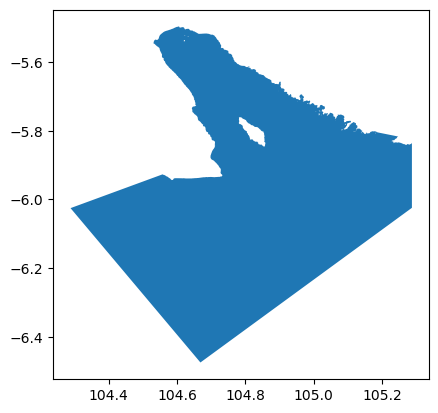

In [11]:
# QUICK PLOT
shp_sel.plot()

In [12]:
shp_sel = shp_sel.to_crs("EPSG:4326")
dset_clipped = dsrose.rio.write_crs("EPSG:4326").rio.clip(shp_sel.geometry, shp_sel.crs, drop=True)
dset_clipped

<xarray.Dataset> Size: 865kB
Dimensions:      (lat: 15, lon: 15, time: 60)
Coordinates:
  * lat          (lat) float64 120B -6.438 -6.375 -6.312 ... -5.625 -5.562
  * lon          (lon) float64 120B 104.4 104.4 104.5 ... 105.1 105.2 105.2
  * time         (time) datetime64[ns] 480B 2020-01-01 2020-02-01 ... 2024-12-01
    spatial_ref  int64 8B 0
Data variables: (12/16)
    dir          (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    hmax         (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    hs           (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    lm           (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    pdi00        (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    pdi01        (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    ...           ...
    ptp00        (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    ptp01        (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    ptp02        (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    t01          (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    uwnd         (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
    vwnd         (time, lat, lon) float32 54kB dask.array<chunksize=(1, 15, 15), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    description:  InaWaves Model - Merge Hindcast, Reanalysis, and Forecast
    email:        produksi.maritim@bmkg.go.id
    institution:  BMKG - Center For Marine Meteorology
    source:       WaveWatch3 forced by GFS Model

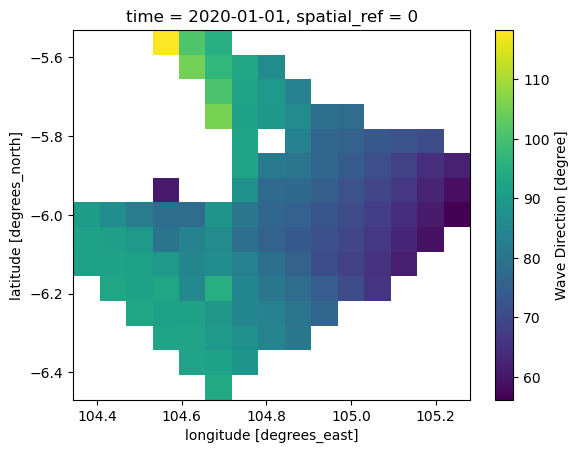

In [13]:
# QUICK PLOT
dset_clipped['dir'].isel(time=0).plot()

#### Agregasi spasial

In [14]:
dset_clipped_mean = dset_clipped.mean(dim=['lon','lat'])
dset_clipped_mean

<xarray.Dataset> Size: 4kB
Dimensions:      (time: 60)
Coordinates:
  * time         (time) datetime64[ns] 480B 2020-01-01 2020-02-01 ... 2024-12-01
    spatial_ref  int64 8B 0
Data variables: (12/16)
    dir          (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    hmax         (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    hs           (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    lm           (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    pdi00        (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    pdi01        (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    ...           ...
    ptp00        (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    ptp01        (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    ptp02        (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    t01          (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    uwnd         (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>
    vwnd         (time) float32 240B dask.array<chunksize=(1,), meta=np.ndarray>

#### Plotting

File saved at wave_rose_sunda_selatan.png


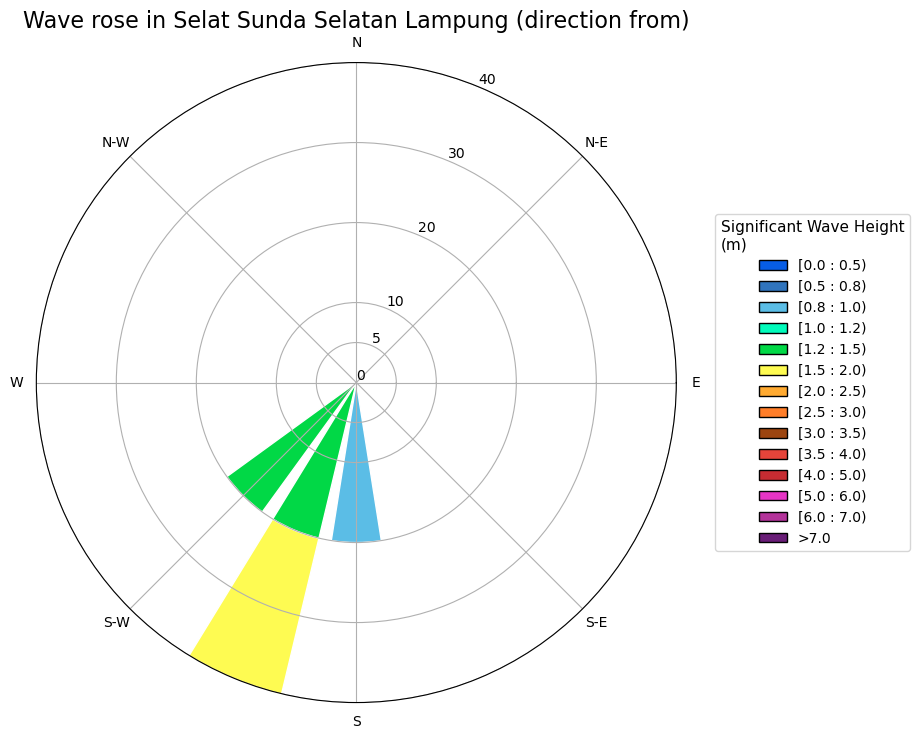

In [17]:
dsrosegrouped = dset_clipped_mean.groupby('time.month')
dsroseplot    = dsrosegrouped[1]

model     = 'inawave'
var       = 'swh'
ds        = dsroseplot
map_title = 'Wave rose in Selat Sunda Selatan Lampung (direction from)'
file_name = 'wave_rose_sunda_selatan.png'
bins      = sorted([5] + [int(num) for num in np.arange(0, 41, 10)])

klimtool.plot_rose(model, 'swh', dsroseplot, bins, map_title, file_name)